# **Machine Learning Assignment#1 - Student Id#: 1191408 - Student Name: Ayham Maree - Section#: 2**




**The enclosed cars.csv file encompasses a collection of data on cars, specifically focusing on fuel consumption. This task involves an examination of the dataset and the analysis of various facets. Python is the designated programming language for completing this assignment.**



 1. Read the dataset and examine how many features and examples does it have?







In [1]:
import pandas as pd

cars_dataframe=pd.read_csv("cars.csv")

print(f"in this dataset of Cars the number of features is: {cars_dataframe.shape[1]}, and the number of examples is: {cars_dataframe.shape[0]}\n")

display(cars_dataframe)



in this dataset of Cars the number of features is: 8, and the number of examples is: 398



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,USA
394,44.0,4,97.0,52.0,2130,24.6,82,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,USA
396,28.0,4,120.0,79.0,2625,18.6,82,USA


Note that the tuple returned by DataFrame.shape signifies the dimensions of the DataFrame, So the dimensions of the DataFrame give us the number of features and number of examples.







2. Are there features with missing values? How many missing values are there in each one?

In [2]:
missing = cars_dataframe.isnull().sum()

features_haveMissing = missing[missing > 0]
if not features_haveMissing.empty:
    print("The Features that have missing values and the number of the missing values is:")
    print(features_haveMissing)


The Features that have missing values and the number of the missing values is:
horsepower    6
origin        2
dtype: int64


Upon examination and by using isnull() function, we discovered that the columns with missing values are the horsepower (6 occurrences) and origin (2 occurrences).

3.  Fill the missing values in each feature using a proper imputation method

In [3]:
if not features_haveMissing.empty:
    for predictor in features_haveMissing.index:
        if pd.api.types.is_numeric_dtype(cars_dataframe[predictor]):
          cars_dataframe[predictor].fillna(cars_dataframe[predictor].mean()  , inplace=True)
          print(f"feature {predictor} filled its missing value with mean: {cars_dataframe[predictor].mean()}")
        else:
            cars_dataframe[predictor].fillna(cars_dataframe[predictor].mode()[0] , inplace=True)
            print(f"feature {predictor} filled its missing value with mode: {cars_dataframe[predictor].mode()[0]}")


feature horsepower filled its missing value with mean: 104.46938775510203
feature origin filled its missing value with mode: USA


Upon identifying columns with empty values, we opted to populate them by employing the median for columns featuring numerical values and the mode for those containing categorical variable, here we check the features if it values is numbers or categorical variables, and if numbers use the median else use the mode.


4.  Which country produces cars with better fuel economy?

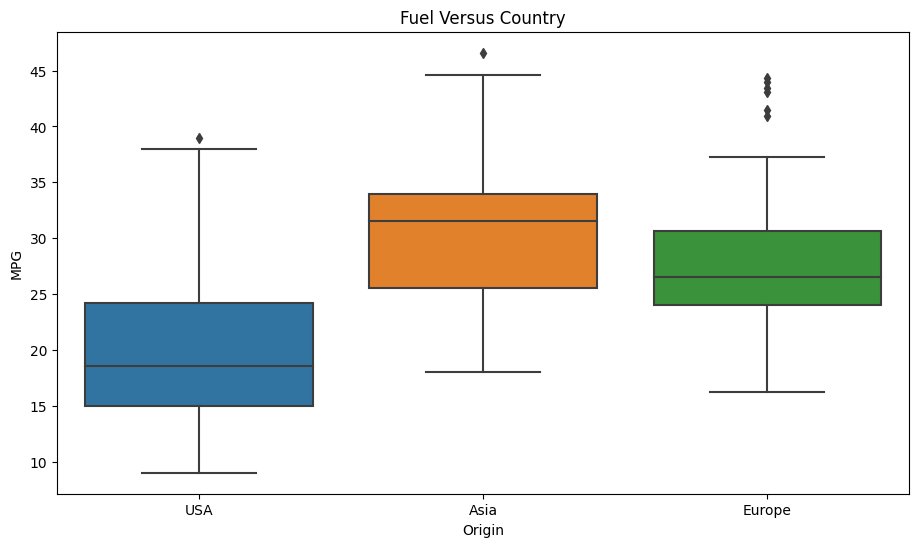

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(11, 6))
sns.boxplot(x='origin', y='mpg', data=cars_dataframe)
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.title('Fuel Versus Country')
plt.show()

Note that in the depicted box plot, the minimum and maximum mpg values for each country are presented. The colored area within each box is accompanied by a horizontal line denoting the median. This visual analysis indicates that Asia boasts the most favorable fuel economy among the represented countries.

5. Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’?

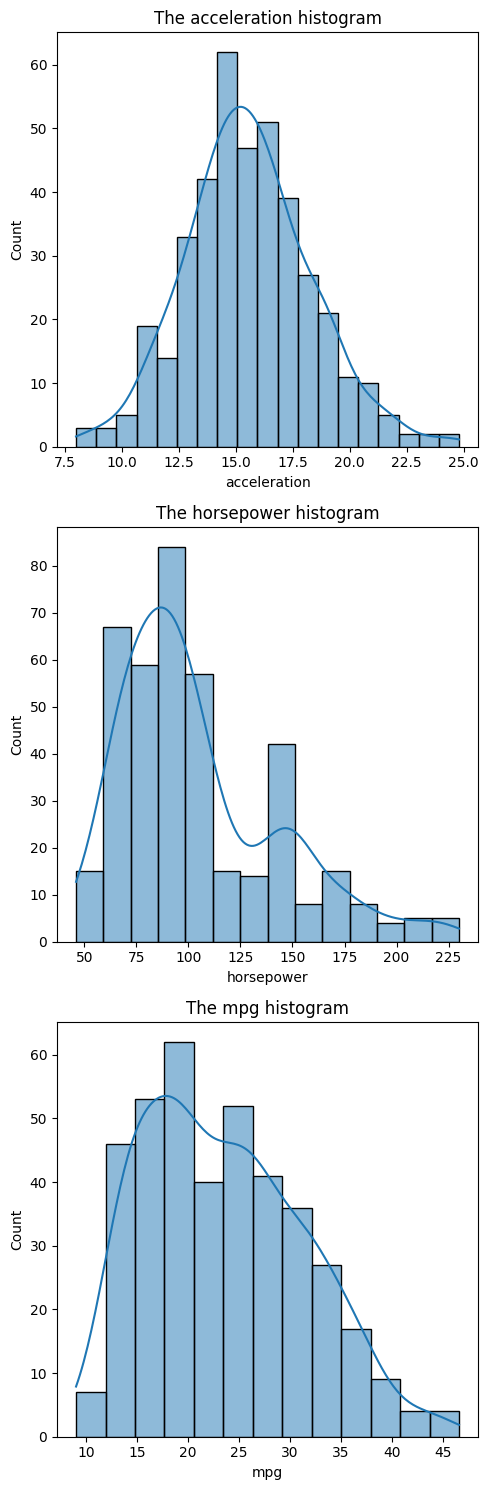

In [5]:
plot,axis = plt.subplots(nrows=3, ncols=1, figsize=(5, 15))

Name_Of_Features=['acceleration','horsepower','mpg']
i=0
for name in Name_Of_Features:
  sns.histplot(cars_dataframe[name], kde=True, ax=axis[i])
  axis[i].set_title(f'The {name} histogram')
  i= i+1



plt.tight_layout()
plt.show()


Examining the three graphs above, it becomes clear that acceleration is the feature that shows the closest resemblance to a Gaussian distribution, due to its closeness to the bell shape, where values are concentrated in the middle and decrease as we move towards the edges.

6. Support your answer for part 5 by using a quantitative measure.


In [6]:
for name in Name_Of_Features:
  skewness= cars_dataframe[name].skew()
  print(f"{name} Skewness: {skewness}")

acceleration Skewness: 0.27877684462588986
horsepower Skewness: 1.0955524807071189
mpg Skewness: 0.45706634399491913


In this part to support the result in the previous with quntitave measure the skweness test has been used to provide insights about each feature distribuation shape, and the technique uses by it, if skewness was zero it suggests a normal distribuation, but if skewness was greater than zero the inidication that more weight in the right tail and if it less than zero the indication that more weight in the left tail.


Based on the results that appeared above, they showed that the acceleration feature is the closest shape to a normal distribution, due to its skewness value approaching zero.

7. Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?

The coefficient of correlation between horsepower and mpg: -0.7714371350025522



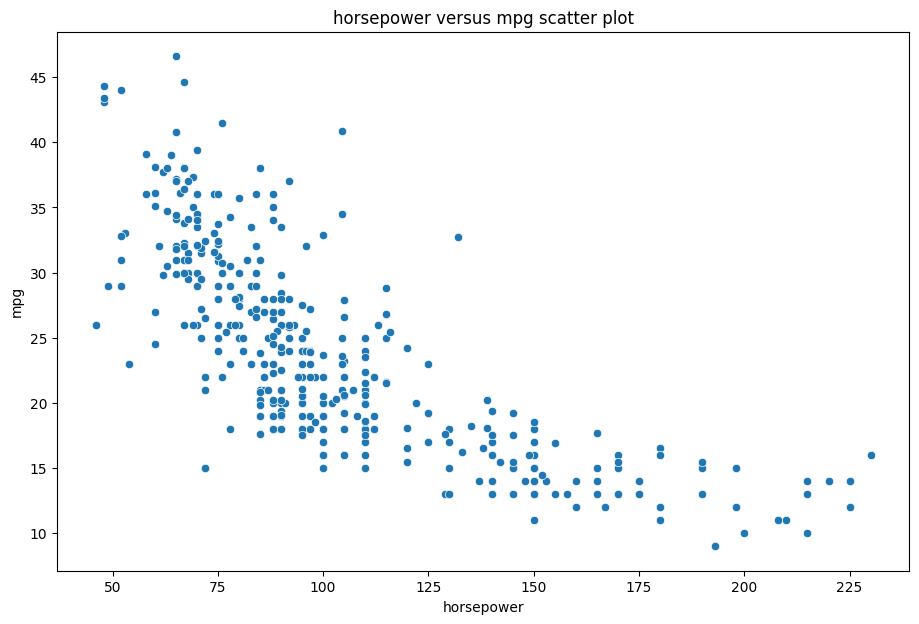

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt



correltionCof = cars_dataframe['horsepower'].corr(cars_dataframe['mpg'])
print(f"The coefficient of correlation between horsepower and mpg: {correltionCof}\n")


plt.figure(figsize=(11, 7))
sns.scatterplot(x='horsepower', y='mpg', data=cars_dataframe)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('horsepower versus mpg scatter plot')
plt.show()





The correlation coefficient is -0.7714371350025522  indicating a strong negative correlation between the mpg feature and horsepower feature. This implies that as horsepower increases, there is a observable tendency for mpg to decrease, and the graph showing it obviously.

8. Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line on the same scatter plot you got in part 7.


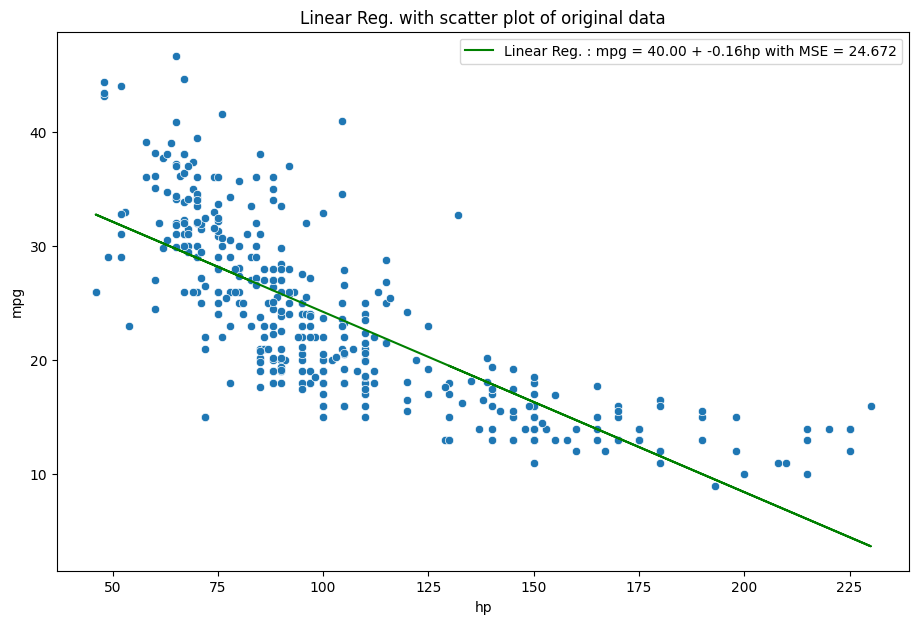

In [8]:
import numpy as np


n = cars_dataframe.shape[0]
hp = cars_dataframe['horsepower'].values.reshape(-1,1)
mpg = cars_dataframe['mpg'].values.reshape(-1,1)



HP = np.concatenate([np.ones_like(hp), hp], axis=1)
inv = np.linalg.inv(HP.T @ HP)
W =   inv @ HP.T @ mpg
f = (HP @ W)
MSE = np.sum(np.power(f - mpg, 2))/n


plt.figure(figsize=(11, 7))
plt.plot(hp, f, color='green', label=f'Linear Reg. : mpg = {W[0, 0]:.2f} + {W[1, 0]:.2f}hp with MSE = {MSE:.3f}')
sns.scatterplot(x='horsepower', y='mpg', data=cars_dataframe)
plt.legend()
plt.xlabel('hp')
plt.ylabel('mpg')
plt.title('Linear Reg. with scatter plot of original data')
plt.show()


In this part, the goal was to build a model to predict the mpg value by knowing the horsepower value, this is done by using a simple linear regression.

$$ F(x) = X^T W = w_0 + w_1\times x $$

and after using the simple linear regression, the values of w0 and w1 were calculated, w0 = 40.00 and w1= -0.16 with mean square error equals to 24.672.





9. Repeat part 8 but now learn a quadratic function of the form
$$ F(x) = X^T W = w_0 + w_1\times x + w_2\times x^2 $$


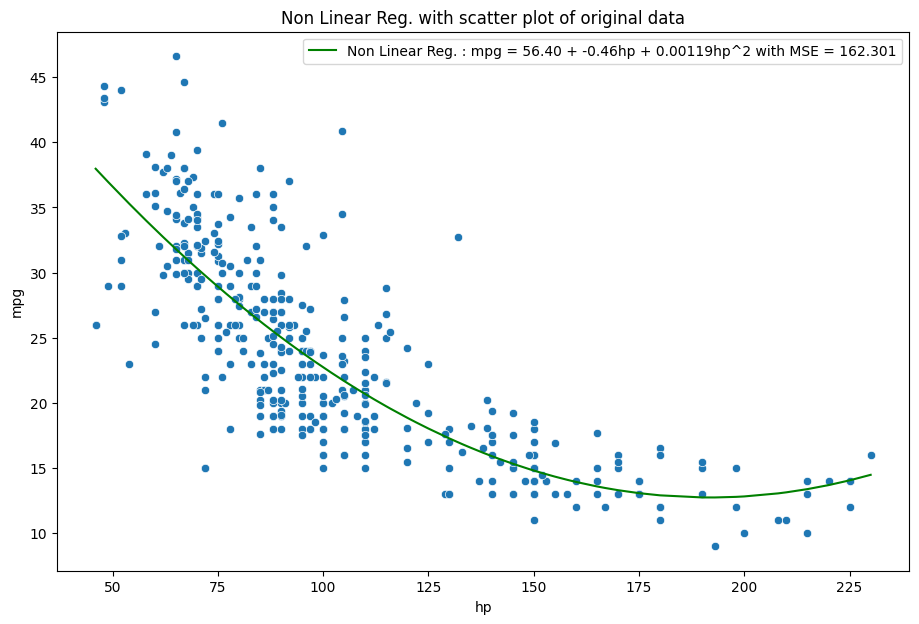

In [10]:
import numpy as np


n = cars_dataframe.shape[0]
hp = cars_dataframe['horsepower'].values.reshape(-1,1)
mpg = cars_dataframe['mpg'].values.reshape(-1,1)



HP = np.concatenate([np.ones_like(hp), hp, hp**2], axis=1)
inv = np.linalg.inv(HP.T @ HP)
W =   inv @ HP.T @ mpg
hp_sorted = np.sort(hp, axis=0)
f = W[0, 0] + W[1, 0]*hp_sorted + W[2, 0]* (hp_sorted**2)
MSE = np.sum(np.power(f - mpg, 2))/n


plt.figure(figsize=(11, 7))
plt.plot(hp_sorted, f, color='green', label=f'Non Linear Reg. : mpg = {W[0, 0]:.2f} + {W[1, 0]:.2f}hp + {W[2, 0]:.5f}hp^2 with MSE = {MSE:.3f}')
sns.scatterplot(x='horsepower', y='mpg', data=cars_dataframe)
plt.legend()
plt.xlabel('hp')
plt.ylabel('mpg')
plt.title('Non Linear Reg. with scatter plot of original data')
plt.show()

In this part, the goal was to build a model to predict the mpg value by knowing the horsepower value, this is done by using a non linear regression with quadrtic function or polynomial function

$$ F(x) = X^T W = w_0 + w_1\times x + w_2\times x^2 $$

and after using the non linear regression, the values of w0, w1 and w2 were calculated, w0 = 56.40 and w1= -0.46, w2 = 0.00119 with mean square error equals to 162.301, and here the mean square error was much higher than the simple linear regression.

10. Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.

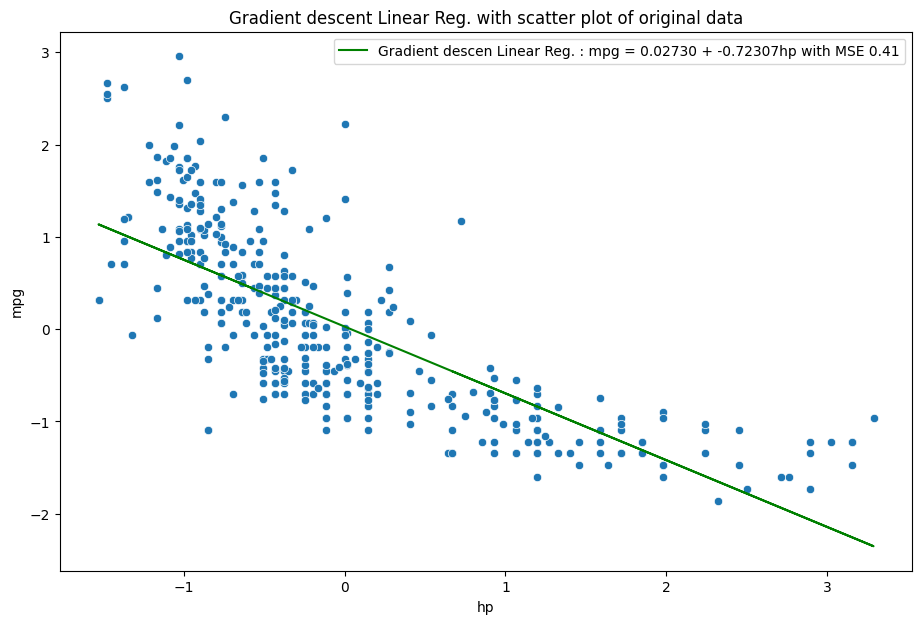

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cars_dataframe['horsepower_normalized'] = scaler.fit_transform(cars_dataframe[['horsepower']])
cars_dataframe['mpg_normalized'] = scaler.fit_transform(cars_dataframe[['mpg']])

cars_dataframe['hp0'] =1
n = cars_dataframe.shape[0]
hp = cars_dataframe['horsepower_normalized'].values
mpg = cars_dataframe['mpg_normalized'].values
HP = cars_dataframe[['hp0', 'horsepower_normalized']].values
alpha = 0.0004
epochs = 9000
W = [1 , 1]

for epoch in range(epochs):
    f =  HP @ W
    g = ((HP.T @ (f - mpg)) / n)
    W = W - (alpha * g)

f =  HP @ W
MSE = np.sum(np.power(f - mpg, 2))/n

plt.figure(figsize=(11, 7))
plt.plot(hp, f, color='green', label=f'Gradient descen Linear Reg. : mpg = {W[0]:.5f} + {W[1]:.5f}hp with MSE {MSE:.2f}')
sns.scatterplot(x='horsepower_normalized', y='mpg_normalized', data=cars_dataframe)
plt.legend()
plt.xlabel('hp')
plt.ylabel('mpg')
plt.title('Gradient descent Linear Reg. with scatter plot of original data')
plt.show()

In this part before any learning model, the data of horspower and mpg have been normlized to save it from overflow and  to save our time and decrease number of epochs or iterations, so the equation of gradient after normalization:
$$ g_j = \frac{2}{n} \sum_{i}^{n} (f(x_i)-y_1)x_{ij} $$

and the value of the weight each iteration or epoch:

$$ \hat{w}_j^{(t+1)} = \hat{w}_j^{(t)} - \alpha  g^{(t)}_j $$

note that lerarning rate has been used as 0.0004 and the number of epochs(iterations) is 9000 and the best result was in this point, if we use this algorthim without normalization number of epochs will be 100 twice times the numbe rof epochs after normalization.

and the value of w0= 0.0270 and w1= -0.7230 with mean squared error = 0.41